In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

The slope is a measure of how steep the line is, while the intercept is a measure of where the line hits the y-axis.

y = m x + b

* m is the slope
* b is the intercept. 
* y is a given point on the y-axis, 
* it corresponds to a given x on the x-axis.

In [2]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#slope:
m = 8

#intercept:
b = 40

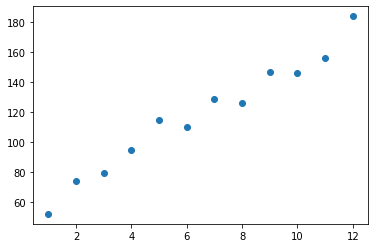

In [6]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 8
#intercept:
b = 40

plt.plot(months, revenue, "o")

plt.show()

* Create a new list, y, that has every element in months, multiplied by m and added to b.

In [7]:
y = [(value * m) + b for value in months]

Plot the y values against months as a line on top of the scatterplot that was plotted with the line plt.plot(months, revenue, "o").

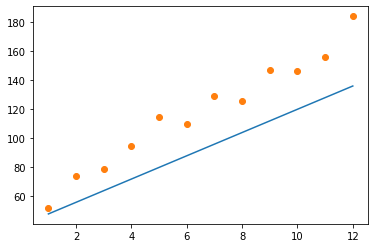

In [8]:
plt.plot(months, y)
plt.plot(months, revenue, "o")

Change m and b to the values that you think match the data the best.

What does the slope look like it should be? And the intercept?

changed m to 10 and b to 50

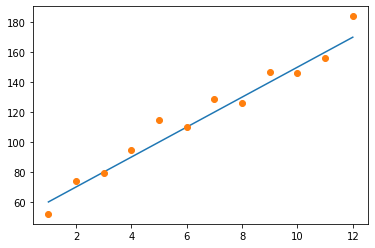

In [9]:
#slope:
m = 10
#intercept:
b = 50

y = [(value * m) + b for value in months]
plt.plot(months, y)
plt.plot(months, revenue, "o")

plt.show()

#### Thought -> How are my values of m and b affecting the shape of the line..

# Loss

When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is.

For each data point, we calculate loss, a number that measures how bad the model’s (in this case, the line’s) prediction was. You may have seen this being referred to as error.

We can think about loss as the squared distance from the point to the line. We do the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss in the same way:

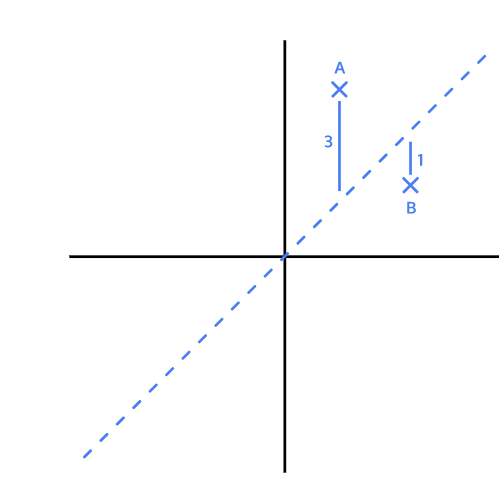

In [11]:
from IPython.display import Image
Image("linear regression1.png")

### In this example:

* For point A, the squared distance is 9 (3²)
* For point B, the squared distance is 1 (1²)

So the total loss, with this model, is 10. If we found a line that had less loss than 10, that line would be a better model for this data.

#### Q1 
We have three points, (1, 5), (2, 1), and (3, 3). We are trying to find a line that produces lowest loss.

We have provided you the list of x-values, x, and y-values, y, for these points.

Find the y-values that the line with weights m1 and b1 would predict for the x-values given. Store these in a list called y_predicted1.

In [12]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

In [14]:
y_predicted1 = [(value * m1) + b1 for value in x ]

#### Q2 
Find the y values that the line with weights m2 and b2 would predict for the x-values given. Store these in a list called y_predicted2.

In [17]:
m2 = 0.5
b2 = 1

y_predicted2 = [(value * m2) + b2 for value in x ]

#### Q3
Create a variable called total_loss1 and set it equal to zero.

Then, find the sum of the squared distance between the actual y-values of the points and the y_predicted1 values by looping through the list:
    
* Calculating the difference between y and y_predicted1
* Squaring the difference
* Adding it to total_loss1

Similarly follow the same for the y_predicted2 as well and assign the equation to total_loss2

In [20]:
print(y)
print(y_predicted2)

[5, 1, 3]
[1.5, 2.0, 2.5]


In [25]:
total_loss1 = sum([(i-j) ** 2 for i,j in zip(y, y_predicted1)])
print(total_loss1)

17


In [27]:
total_loss2 = sum([(i-j) ** 2 for i,j in zip(y, y_predicted2)])
print(total_loss2)

13.5


#### Conclusion -> As total loss 2 is having lower total loss therefore it will turn out to be a better fit..

### Minimizing Loss
The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.
* We always try getting the best intercept and the slope term.

### Gradient Descent for Intercept
As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom:

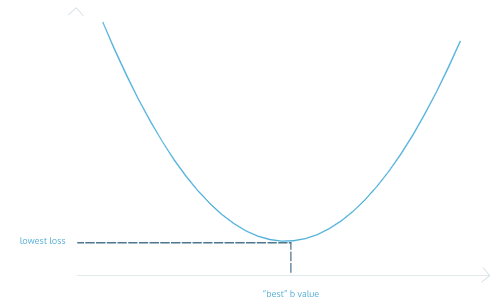

In [32]:
Image("intercept gradient .png")

The process by which we do this is called `gradient descent`. We move in the direction that decreases our loss the most. Gradient refers to the slope of the curve at any point.

For example, let’s say we are trying to find the intercept for a line. We currently have a guess of 10 for the intercept. At the point of 10 on the curve, the slope is downward. Therefore, if we increase the intercept, we should be lowering the loss. So we follow the gradient downwards.

We derive these gradients using calculus. It is not crucial to understand how we arrive at the gradient equation. To find the gradient of loss as intercept changes, the formula comes out to be:

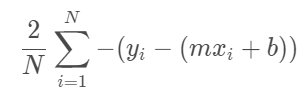

In [33]:
Image('first picture.png')

* N -> is the number of points we have in our dataset
* m -> is the current gradient guess
* b -> is the current intercept guess

Basically:

* we find tmhe sum of y_value - (m*x_value + b) for all the y_values and x_values we have
* and then we multiply the sum by a factor of -2/N. N is the number of points we have.

#### Q1 
Define a function called get_gradient_at_b() that takes in a set of x values, x, a set of y values, y, a slope m, and an intercept value b.

For now, have it return b, unchanged.

In [29]:
def get_gradient_at_b(x,y,m,b):
    return b

#### Q 2
In the get_gradient_at_b() function, we want to go through all of the x values and all of the y values and compute (y - (m*x+b)) for each of them.

Create a variable called diff that has the sum of all of these values.

Instead of returning b from the get_gradient_at_b() function, return diff.

In [30]:
def get_gradient_at_b(x,y,m,b):
    diff = 0
    
    for i in range(len(x)):
        diff += (y[i] - (m * x[i] + b))
    return diff

### Q3

Still in the get_gradient_at_b() function, define a variable called b_gradient and set it equal to the -2/N multiplied by diff.

Note: N is the number of points, i.e. the length of the x list or the y list.

Instead of returning diff, return b_gradient.

In [31]:
def get_gradient_at_b(x,y,m,b):
    diff = 0
    N = len(x)
    
    for i in range(len(x)):
        diff += (y[i] - (m * x[i] + b))
    b_gradient = -2/N * diff
    return b_gradient

## Gradient Descent for Slope
We have a function to find the gradient of b at every point. To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:


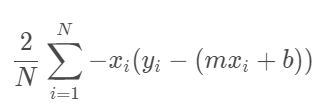

In [36]:
Image('second.png')

Once more:

* N is the number of points you have in your dataset
* m is the current gradient guess
* b is the current intercept guess

To find the m gradient:

* we find the sum of x_value * (y_value - (m*x_value + b)) for all the y_values and x_values we have
* and then we multiply the sum by a factor of -2/N. N is the number of points we have.

Once we have a way to calculate both the `m` gradient and the `b` gradient, we’ll be able to follow both of those gradients downwards to the point of lowest loss for both the `m` value and the `b` value. Then, we’ll have the best `m` and the best `b` to fit our data!

#### Q1 
In this function, we want to go through all of the x values and all of the y values and compute x*(y - (m*x+b)) for each of them.

Create a variable called diff that has the sum of all of these values, and return it from the function.

In [37]:
def get_gradient_at_m(x, y, m, b):
    diff = 0
    for i in range(len(x)):
      diff += x[i] * (y[i] - (m * x[i] + b))
    return diff

#### Q2
Define a variable called m_gradient and set it equal to the -2/N multiplied by diff.

Instead of returning diff, return m_gradient.

In [39]:
def get_gradient_at_m(x, y, m, b):
    diff = 0
    N = len(x)
    for i in range(len(x)):
        diff += x[i] * (y[i] - (m * x[i] + b))
    m_gradient = -2/N * diff
    return m_gradient

Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!

We can scale the size of the step by multiplying the gradient by a learning rate.

To find a new `b` value, we would say:
new_b = current_b - (learning_rate + b_gradient)

where current_b is our guess for what the b value is, b_gradient is the gradient of the loss curve at our current guess, and learning_rate is proportional to the size of the step we want to take.

In a few exercises, we’ll talk about the implications of a large or small learning rate, but for now, let’s use a fairly small value.

#### Q1 
Define a function called step_gradient() that takes in x, y, b_current, and m_current.

This function will find the gradients at b_current and m_current, and then return new b and m values that have been moved in that direction.

For now, just return the pair (b_current, m_current).

#### Q2
Inside step_gradient(), find the gradient at b_current and the gradient at m_current using the functions defined before (get_gradient_at_b and get_gradient_at_m).

Store these gradients in variables called b_gradient and m_gradient, and return these from the function instead of b_current and m_current.

In [51]:
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current) 
  
    return (b_gradient, m_gradient) 

#### Q3
Let’s try to move the parameter values in the direction of the gradient at a rate of 0.01.

Create variables called b and m:

* `b` should be `b_current - (0.01 * b_gradient)`
* `m` should be `m_current - (0.01 * m_gradient)`
Return the pair `b` and `m` from the function.

In [53]:
def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current) 
    b = b_current - (0.01 * b_gradient)
    m = m_current - (0.01 * m_gradient)
    return (b, m) 

In [54]:
b,m = step_gradient(months, revenue, b,m)

## Getting the whole together:

In [63]:
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
        m_gradient = -(2/N) * diff  
    return m_gradient

# Define your step_gradient function here

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# Call your function here to update b and m
print(b, m)

def step_gradient(x, y, b_current, m_current):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current) 
    b = b_current - (0.01 * b_gradient)
    m = m_current - (0.01 * m_gradient)
    return (b, m) 
  
b,m = step_gradient(months, revenue, b,m)
print(b)
print(m)



0 0
2.355
17.78333333333333


## Convergence

How do we know when we should stop changing the parameters m and b? How will we know when our program has learned enough?

To answer this, we have to define convergence. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.

Hopefully, the algorithm will converge at the best values for the parameters m and b.

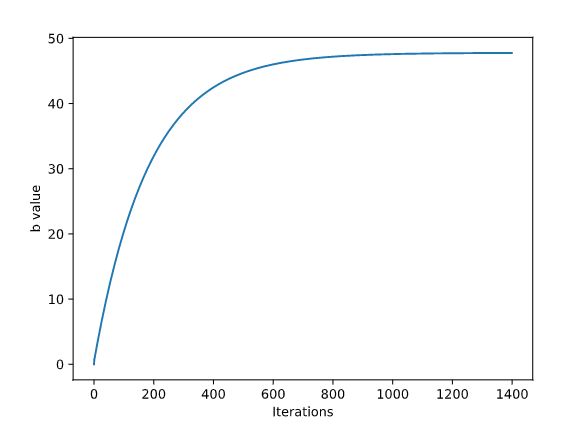

In [64]:
Image('pic4.png')

#### Above we could notice that it has taken clsoe to 600 iterations and b value of 45 to converge..

## Learning Rate
We want our program to be able to iteratively learn what the best m and b values are. So for each m and b pair that we guess, we want to move them in the direction of the gradients we’ve calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go.

A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value. It might never converge! Oh no!


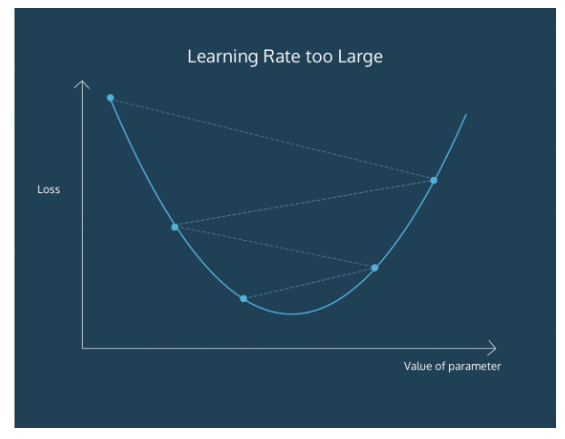

In [65]:
Image('learning rate.png')

Finding the absolute best learning rate is not necessary for training a model. You just have to find a learning rate large enough that gradient descent converges with the efficiency you need, and not so large that convergence never happens.

## Put it Together II

At each step, we know how to calculate the gradient and move in that direction with a step size proportional to our learning rate. Now, we want to make these steps until we reach convergence.

#### Q1
Now, let’s create a function called gradient_descent() that takes in x, y, learning_rate, and a num_iterations.

For now, return [-1,-1].

In [66]:
def gradient_descent(x, y, learning_rate, num_iterations):
    return [-1,-1]

#### Q2
In the function gradient_descent(), create variables b and m and set them both to zero for our initial guess.

Return b and m from the function.

In [67]:
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    return b, m

#### Q3 
Update your step_gradient() function to take in the parameter learning_rate (as the last parameter) and replace the 0.01s in the calculations of b_gradient and m_gradient with learning_rate.

In [68]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

#### Q4
Let’s go back and finish the gradient_descent() function.

Create a loop that runs num_iterations times. At each step, it should:

* Call step_gradient() with b, m, x, y, and learning_rate
* Update the values of b and m with the values step_gradient() returns.

In [69]:
#Your gradient_descent function here:  
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b,m]  

#### Q5
Outside of the function, uncomment the line that calls gradient_descent on months and revenue, with a learning rate of 0.01 and 1000 iterations.

It stores the results in variables called b and m.

In [70]:
#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

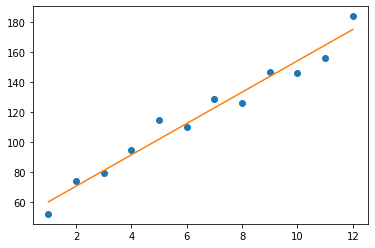

In [71]:
#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

## Temperature to check the following:

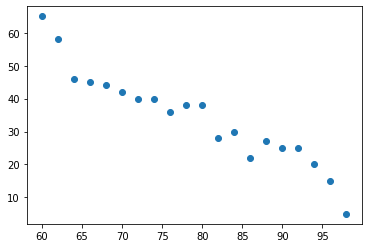

In [103]:
temperature = np.array(range(60, 100, 2))
temperature = temperature.reshape(-1, 1)
sales = [65, 58, 46, 45, 44, 42, 40, 40, 36, 38, 38, 28, 30, 22, 27, 25, 25, 20, 15, 5]

plt.plot(temperature, sales, 'o')
plt.show()

In [155]:
b,m = gradient_descent(temperature,sales, 0.00008,1000)

In [156]:
b

array([0.42313158])

In [157]:
m

array([0.39769453])

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
model = LinearRegression()

In [136]:
model.fit(temperature,sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
model.coef_

array([-1.15225564])

In [138]:
model.intercept_

125.47819548872184